<a href="https://colab.research.google.com/github/zooodung/Face_Image_Emotion_Classification/blob/main/Face_Image_Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얼굴 이미지 감정 분류 (Anger / Happy / Panic / Sadness)

## Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Img Data

In [ ]:
#train_img_dir = '/content/drive/MyDrive/Project/Data/img/train'
#val_img_dir = '/content/drive/MyDrive/Project/Data/img/val'
train_dir = 'content/img_processed/train'
val_dir = 'content/img_processed/val'

In [ ]:
# Train Data
# Validation Data
import zipfile
import os

def unzip_file(zip_file_path, extract_dir):
    # 압축 파일 열기
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # 압축 해제
        zip_ref.extractall(extract_dir)

# 압축 파일 경로와 추출할 디렉토리 경로 지정
zip_file_path = '/content/drive/MyDrive/Project/Data/img_preprocessed.zip'
extract_dir = '/content/img_preprocessed'

# 압축 파일 풀기
unzip_file(zip_file_path, extract_dir)

train_dir = '/content/img_p/train'
val_dir = '/content/img_p/val'

# Test Data
import zipfile
import os

def unzip_file(zip_file_path, extract_dir):
    # 압축 파일 열기
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # 압축 해제
        zip_ref.extractall(extract_dir)

# 압축 파일 경로와 추출할 디렉토리 경로 지정
zip_file_path = '/content/drive/MyDrive/Project/Data/test_img.Zip'
extract_dir = '/content/test'

# 압축 파일 풀기
unzip_file(zip_file_path, extract_dir)

### Label Data

In [ ]:
import json

# Train Data
with open ('/content/drive/MyDrive/Project/Data/label/train/train_anger.json', "r", encoding='euc-kr') as f:
    train_anger_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/label/train/train_happy.json', "r", encoding='euc-kr') as f:
    train_happy_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/label/train/train_panic.json', "r", encoding='euc-kr') as f:
    train_panic_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/label/train/train_sadness.json', "r", encoding='euc-kr') as f:
    train_sadness_label = json.load(f)

# Validation Data
with open ('/content/drive/MyDrive/Project/Data/label/val/val_anger.json', "r", encoding='euc-kr') as f:
    val_anger_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/label/val/val_happy.json', "r", encoding='euc-kr') as f:
    val_happy_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/label/val/val_panic.json', "r", encoding='euc-kr') as f:
    val_panic_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/label/val/val_sadness.json', "r", encoding='euc-kr') as f:
    val_sadness_label = json.load(f)

# Test Data
with open ('/content/drive/MyDrive/Project/Data/Test_data/label/test_anger.json', "r", encoding='euc-kr') as f:
    test_anger_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/Test_data/label/test_happy.json', "r", encoding='euc-kr') as f:
    test_happy_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/Test_data/label/test_panic.json', "r", encoding='euc-kr') as f:
    test_panic_label = json.load(f)
with open ('/content/drive/MyDrive/Project/Data/Test_data/label/test_sadness.json', "r", encoding='euc-kr') as f:
    test_sadness_label = json.load(f)

### Segment Data

In [ ]:
import numpy as np

# Train Data
train_anger_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/train/' + 'train_anger.npz')
train_happy_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/train/'  + 'train_happy.npz')
train_panic_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/train/'  + 'train_panic.npz')
train_sadness_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/train/'  + 'train_sadness.npz')
# Validation Data
val_anger_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/val/' + 'val_anger.npz')
val_happy_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/val/'  + 'val_happy.npz')
val_panic_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/val/'  + 'val_panic.npz')
val_sadness_segment = np.load('/content/drive/MyDrive/Project/Data/segmentation/val/'  + 'val_sadness.npz')

## EDA

### 한글 폰트 설정

In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### 'gender', 'age', 'isProf' 상관 계수

In [ ]:
import pandas as pd

train_anger_label_df = pd.DataFrame(train_anger_label)
train_happy_label_df = pd.DataFrame(train_happy_label)
train_panic_label_df = pd.DataFrame(train_panic_label)
train_sadness_label_df = pd.DataFrame(train_sadness_label)
train_label_df = pd.concat([train_anger_label_df, train_happy_label_df, train_panic_label_df, train_sadness_label_df], axis=0)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


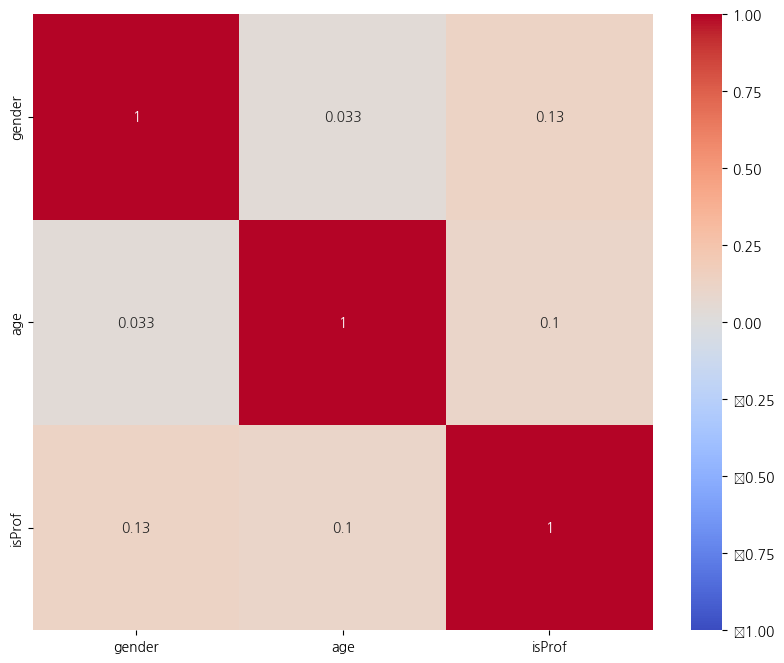

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

label_df = pd.DataFrame(train_label_df)

label_df['gender'] = label_df['gender'].replace({'남': 1, '여': 0})
label_df['isProf'] = label_df['isProf'].replace({'전문인': 1, '일반인': 0})

correlation_matrix = label_df[['gender', 'age', 'isProf']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


### Emotion별 남/여 비율

In [ ]:
emotion_dataframes = {} # 데이터프레임들을 저장할 딕셔너리

emotion_dataframes['anger'] = train_anger_label_df
emotion_dataframes['happy'] = train_happy_label_df
emotion_dataframes['panic'] = train_panic_label_df
emotion_dataframes['sadness'] = train_sadness_label_df

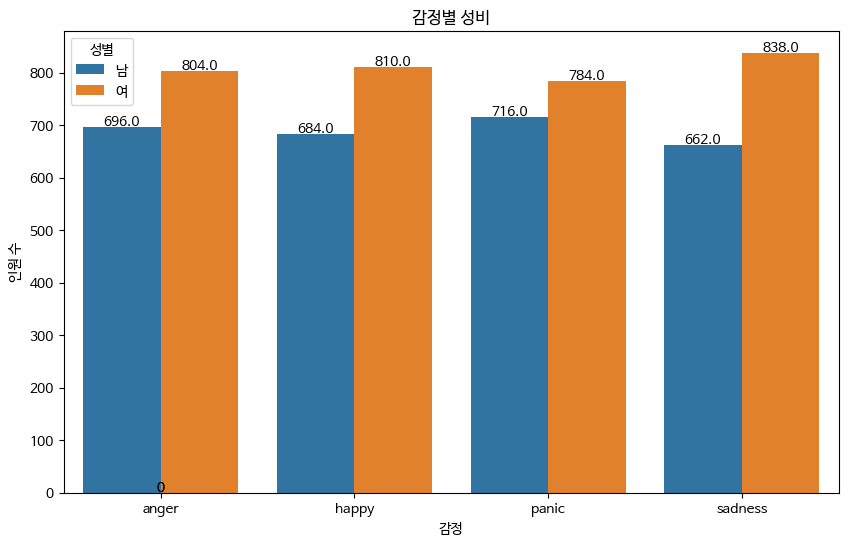

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 모든 감정 데이터를 하나의 DataFrame으로 결합
combined_df = pd.DataFrame()
for emotion, df in emotion_dataframes.items():
    df['emotion'] = emotion  # 각 DataFrame에 'emotion' 컬럼 추가
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 성비 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='emotion', hue='gender', data=combined_df)
plt.title('감정별 남/여 비율')
plt.xlabel('감정')
plt.ylabel('인원 수')
plt.legend(title='성별')

# 각 막대에 숫자 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

plt.show()

### Emotion별 일반인/전문가 분포

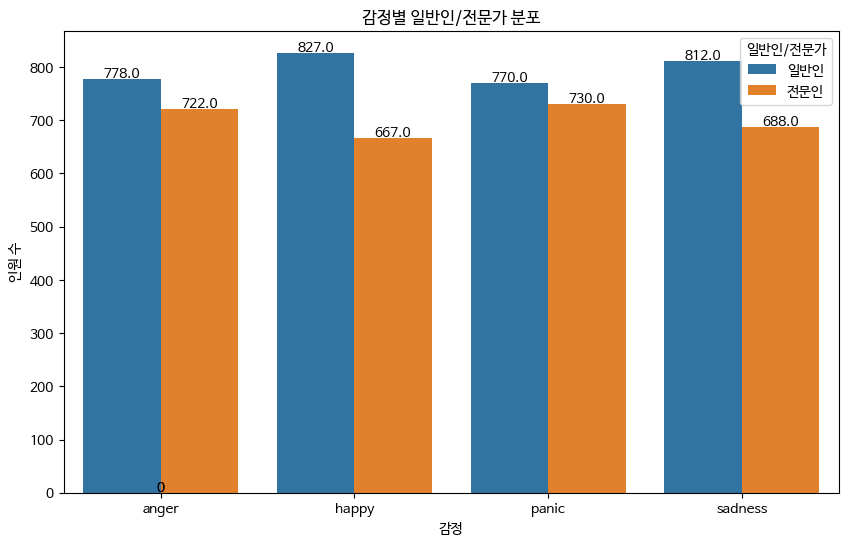

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 모든 감정 데이터를 하나의 DataFrame으로 결합
combined_df = pd.DataFrame()
for emotion, df in emotion_dataframes.items():
    df['emotion'] = emotion  # 각 DataFrame에 'emotion' 컬럼 추가
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 전문가 여부를 감정별로 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='emotion', hue='isProf', data=combined_df)
plt.title('감정별 일반인/전문가 분포')
plt.xlabel('감정')
plt.ylabel('인원 수')
plt.legend(title='일반인/전문가')

# 각 막대에 숫자 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha="center")

plt.show()

### Label Data Annotation A/B/C 검증

In [ ]:
# 출력 함수
def print_faceExp_count(counts, emotion):
    print(f"Counts for emotion '{emotion}'")
    print(f"  Zero annotation same   : {counts['zero']}")
    print(f"  One annotation same    : {counts['one']}")
    print(f"  Two annotations same   : {counts['two']}")
    print(f"  Three annotations same : {counts['three']}")
    print(f"  Sum of two, three : {counts['two'] + counts['three']}")
    print(f"  Sum of all        : {counts['zero'] + counts['one'] + counts['two'] + counts['three']}")

# 'faceExp_uploader'와 Annotation A/B/C의 'faceExp_uploader' Mismatch 검사 함수
def verify_faceExp_consistent(label, emotion):
  counts = {'zero': 0, 'one': 0, 'two': 0, 'three': 0}
  verified_data = []

  for i in range(len(label)):
    emotion_count = 0
    for annot in ['annot_A', 'annot_B', 'annot_C']:
      if label[i][annot]['faceExp'] == emotion:
        emotion_count += 1

    if emotion_count == 1:
      counts['one'] += 1
    elif emotion_count == 2:
      counts['two'] += 1
      verified_data.append(label[i])
    elif emotion_count == 3:
      counts['three'] += 1
      verified_data.append(label[i])
    else :
      counts['zero'] += 1


  print_faceExp_count(counts, emotion)

  return verified_data

#### Train Label

In [ ]:
verified_anger = verify_faceExp_consistent(train_anger_label, '분노')
verified_happy = verify_faceExp_consistent(train_happy_label, '기쁨')
verified_panic = verify_faceExp_consistent(train_panic_label, '당황')
verified_sadness = verify_faceExp_consistent(train_sadness_label, '슬픔')

Counts for emotion '분노'
  Zero annotation same   : 151
  One annotation same    : 231
  Two annotations same   : 398
  Three annotations same : 720
  Sum of two, three : 1118
  Sum of all        : 1500
Counts for emotion '기쁨'
  Zero annotation same   : 7
  One annotation same    : 13
  Two annotations same   : 76
  Three annotations same : 1398
  Sum of two, three : 1474
  Sum of all        : 1494
Counts for emotion '당황'
  Zero annotation same   : 170
  One annotation same    : 228
  Two annotations same   : 386
  Three annotations same : 716
  Sum of two, three : 1102
  Sum of all        : 1500
Counts for emotion '슬픔'
  Zero annotation same   : 146
  One annotation same    : 234
  Two annotations same   : 414
  Three annotations same : 706
  Sum of two, three : 1120
  Sum of all        : 1500


##### 'faceExp_uploader'와 Annotation A/B/C의 'faceExp_uploader' Mismatch 시각화

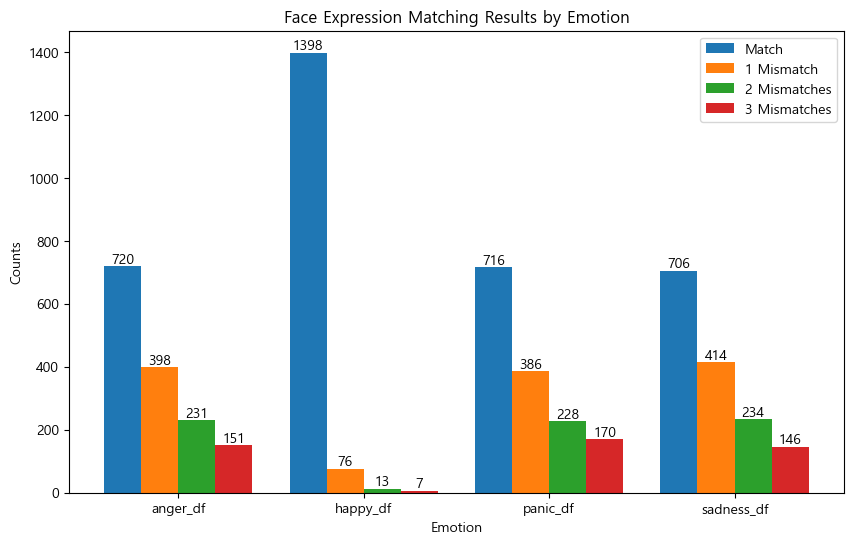

- Zero Same, One Same의 데이터를 직접 탐색해본 결과 실제 라벨링이 잘못되어 있는 것으로 판단 <br>
- 해당 데이터들을 아웃라이어로 간주하며 학습 데이터에서 제외
- 데이터의 균형을 위해 'panic'을 기준 각 감정별 상위 1102개 데이터 활용

#### Validaion Label

In [ ]:
verified_anger = verify_faceExp_consistent(val_anger_label, '분노')
verified_happy = verify_faceExp_consistent(val_happy_label, '기쁨')
verified_panic = verify_faceExp_consistent(val_panic_label, '당황')
verified_sadness = verify_faceExp_consistent(val_sadness_label, '슬픔')

Counts for emotion '분노'
  Zero annotation same   : 22
  One annotation same    : 45
  Two annotations same   : 71
  Three annotations same : 162
  Sum of two, three : 233
  Sum of all        : 300
Counts for emotion '기쁨'
  Zero annotation same   : 3
  One annotation same    : 3
  Two annotations same   : 13
  Three annotations same : 281
  Sum of two, three : 294
  Sum of all        : 300
Counts for emotion '당황'
  Zero annotation same   : 40
  One annotation same    : 47
  Two annotations same   : 79
  Three annotations same : 134
  Sum of two, three : 213
  Sum of all        : 300
Counts for emotion '슬픔'
  Zero annotation same   : 45
  One annotation same    : 60
  Two annotations same   : 69
  Three annotations same : 126
  Sum of two, three : 195
  Sum of all        : 300


- Validation Data에도 동일한 현상을 확인

### Test Label

In [ ]:
verified_anger = verify_faceExp_consistent(test_anger_label, '분노')
verified_happy = verify_faceExp_consistent(test_happy_label, '기쁨')
verified_panic = verify_faceExp_consistent(test_panic_label, '당황')
verified_sadness = verify_faceExp_consistent(test_sadness_label, '슬픔')

Counts for emotion '분노'
  Zero annotation same   : 28
  One annotation same    : 47
  Two annotations same   : 71
  Three annotations same : 134
  Sum of two, three : 205
  Sum of all        : 280
Counts for emotion '기쁨'
  Zero annotation same   : 2
  One annotation same    : 5
  Two annotations same   : 12
  Three annotations same : 279
  Sum of two, three : 291
  Sum of all        : 298
Counts for emotion '당황'
  Zero annotation same   : 18
  One annotation same    : 29
  Two annotations same   : 79
  Three annotations same : 149
  Sum of two, three : 228
  Sum of all        : 275
Counts for emotion '슬픔'
  Zero annotation same   : 29
  One annotation same    : 43
  Two annotations same   : 75
  Three annotations same : 137
  Sum of two, three : 212
  Sum of all        : 284


- 위 Test Label Data의 검사 결과를 근거로 모델의 목표 성능 수치 설정
  - anger : 73.21%
  - happy : 97.65%
  - panic : 82.9%
  - sadness : 74.64%

> 'One annotation same'에 해당하는 이미지를 직접 살펴본 결과 해당 Label Emotion 이라고 판단하기 어려울 정도임을 확인.
<br>따라서, 'One annotation same' 이미지까지 정확히 분류하려고 하는 행위는 모델의 성능을 저하시키는 행위에 가까움.



## 전처리

### 전처리 함수

#### 제공받은 Segmentaion Data를 활용해 얼굴만 출력하고 나머지 요소는 Masking 하는 함수

In [ ]:
# Face만 출력하는 함수
def mask_img(filename, path, segment):
  image = cv2.imread(path + filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  new_img = image.copy()

  # 이미지 face 만 남기고 나머지는 가림
  new_img[segment[filename] == 0] = 0
  new_img[segment[filename] == 1] = 0
  new_img[segment[filename] == 2] = 0
  new_img[segment[filename] == 4] = 0
  new_img[segment[filename] == 5] = 0

  return new_img

#### 경로와 filename으로 원하는 이미지를 Load 하는 함수

In [ ]:
# 이미지 가져오기
def get_image(filename, path):
  image = cv2.imread(path + filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image.copy()

#### Label 데이터의 Annotation A/B/C의 X,Y 좌표의 평균을 구해 이미지의 얼굴만 Crop 하는 함수

In [ ]:
# Label 데이터를 기반으로 이미지 Crop하는 함수
def crop_face(label_data, img):

  boxes = [label_data['annot_A']['boxes'], label_data['annot_B']['boxes'], label_data['annot_C']['boxes']]
  avg_box = { # annot_A/B/C 각 좌표의 평균 값 구해서 저장
      'maxX': np.mean([box['maxX'] for box in boxes]),
      'maxY': np.mean([box['maxY'] for box in boxes]),
      'minX': np.mean([box['minX'] for box in boxes]),
      'minY': np.mean([box['minY'] for box in boxes])
  }

  new_image = img[int(avg_box['minY']):int(avg_box['maxY']), int(avg_box['minX']):int(avg_box['maxX'])] # 평균값으로 이미지 crop

  return new_image

#### MTCNN 라이브러리 활용 얼굴의 특징점(바운딩 박스, 눈, 코, 입) 추출 함수

In [ ]:
! pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import os
import logging
from mtcnn import MTCNN

def extract_face_info_mtcnn(img):

  detector = MTCNN() # MTCNN 인스턴스 생성

  faces = detector.detect_faces(img) # 얼굴 감지
  #face_info_list = [] # 감지된 얼굴 정보를 저장할 리스트 // 하나의 이미지에 다수의 얼굴이 존재할 경우 사용

  # 감지된 모든 얼굴에 대해 반복
  for face in faces:
    # 얼굴의 바운딩 박스와 특징점 추출
    bounding_box = face['box']
    keypoints = face['keypoints']

    # 추출한 정보를 딕셔너리로 저장
    face_info = {
      'bounding_box': bounding_box,
      'keypoints': keypoints
    }

    # 얼굴 정보 리스트에 추가
    #face_info_list.append(face_info)

  return face_info

- 배경이 존재하는 경우 MTCNN의 얼굴 인식률이 매우 떨어짐을 확인

#### 좌/우 눈을 기준으로 수평으로 이미지 회전 함수

In [ ]:
import cv2

# 기울기 계산
def calculate_angle(face_info):
  left_eye = face_info['keypoints']['left_eye']
  right_eye = face_info['keypoints']['right_eye']

  return np.arctan2(right_eye[1] - left_eye[1], right_eye[0] - left_eye[0]) * 180 / np.pi

def rotate_image(image, img_info):
  angle = calculate_angle(img_info)
  # 이미지의 중심 탐색
  height, width = image.shape[:2]
  center = (width / 2, height / 2)

  # 회전 변환 매트릭스 생성
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

  # 이미지 회전
  rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

  return rotated_image

#### MTCNN 라이브러리를 통해 확보한 얼굴의 특징점을 활용해 눈 사이 거리를 정규화, 코끝을 기준으로 이미지 중심 이동

In [ ]:
def normalize_face(image, face_info, output_size=(224, 224)):
    landmarks = face_info['keypoints']
    left_eye = np.array(landmarks['left_eye'])
    right_eye = np.array(landmarks['right_eye'])
    nose_tip = np.array(landmarks['nose'])

    # 눈 사이 거리
    eye_distance = np.linalg.norm(left_eye - right_eye)

    # 스케일링 비율
    desired_eye_distance = 0.3 * output_size[0]
    scale = desired_eye_distance / eye_distance

    # 눈 사이 거리 정규화
    M = np.array([[scale, 0, 0], [0, scale, 0]])
    scaled_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # 코 끝을 기준으로 중심 이동
    nose_center = nose_tip * scale
    offset_x = (output_size[0] / 2) - nose_center[0]
    offset_y = (output_size[1] / 2) - nose_center[1]
    M = np.array([[1, 0, offset_x], [0, 1, offset_y]])
    normalized_image = cv2.warpAffine(scaled_image, M, output_size)

    return normalized_image

#### Dlib 라이브러리를 활용, 얼굴의 특징점 68가지 추출해 Padding을 적용한 후 Crop 하는 함수

In [ ]:
!pip install dlib

In [ ]:
import dlib

# Dlib 활용 얼굴 크롭하는 함수
def cropface_dlib(image, padding=100):
    detector = dlib.get_frontal_face_detector()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face_index, face in enumerate(faces):
        x, y, w, h = face.left(), face.top(), face.width(), face.height()

        # padding 적용
        x -= padding
        y -= padding
        w += padding * 2
        h += padding * 2

        # Ensure the bounding box is within the image boundaries
        x = max(0, x)
        y = max(0, y)
        w = min(image.shape[1] - x, w)
        h = min(image.shape[0] - y, h)

        face_image = image[y:y+h, x:x+w]

    return face_image

### 전처리 파이프라인 함수

- 전처리 파이프라인의 출력 값은 224x224 사이즈 이미지의 array로 Define
- 각 모델의 입력에 구조에 맞추어 shape을 선택 조절해야함.

#### 감정 레이블 정의

In [ ]:
emotion_labels = ['anger', 'happy', 'panic', 'sadness']

##### With Label Data Version

In [ ]:
# 이미지 전처리
def preprocess_pipline_with_label(label, path, segment_data):
  img = get_image(label['filename'], path) # 이미지 불러오기
  img = mask_img(label['filename'], path, segment_data) # 이미지 Masking
  img = crop_face(label, img) # 이미지 크롭
  img_info = extract_face_info_mtcnn(img) # 이미지에서 얼굴 정보 추출
  img = rotate_image(img, img_info) # 눈 수평 회전
  img = normalize_face(img, img_info) # 눈 사이 스케일링, 코 기준 이미지 센터로 이동
  img_array = np.expand_dims(img, axis=0)  # 마지막 차원에 채널 추가
  img_array = img_array.astype('float32') / 255.0  # 0~1 사이 값으로 정규화

  return img_array

- 이후 반복문을 정의하고 매개변수로 해당 감정의 'label[i]', 'img_path', 'segment'을 전달하면 각 감정별 Train, Validation, Test 이미지 데이터의 전처리를 수행할 수 있음.

##### Without Label Data Version

- Label Data가 주어지지 않았다면 Segmentaion Data 또한 주어지지 않은 것으로 간주함.
- 또한 'With Label Data' 버전과 달리 개별 이미지를 입력받을 경우에 해당할 것으로 예상되기 때문에 개별 이미지 전처리 방식으로 설계함.

In [ ]:
def  preprocess_pipline_without_label(path):
    img = cv2.imread(path) # 이미지 로드

    if image is None:
        print(f"Error: Could not read image from '{path}'")

    # 전처리
    image = img.copy()
    image = cropface_dlib(image) # 얼굴 crop

    try:
        face_info = extract_face_info_mtcnn(image) # 얼굴 특징점 추출
        image = rotate_image(image, face_info) # 눈 수평 회전
        image = normalize_face(image, face_info) # 코 기준 이미지 센터로 이동, 눈 사이 스케일링
        img_array = np.expand_dims(image, axis=0)  # 마지막 차원에 채널 추가
        img_array = img_array.astype('float32') / 255.0  # 0~1 사이 값으로 정규화
    except Exception as e:
        image = cv2.resize(image, (224, 224)) # 리사이징
        img_array = np.expand_dims(image, axis=0)  # 마지막 차원에 채널 추가
        img_array = img_array.astype('float32') / 255.0  # 0~1 사이 값으로 정규화

    return img_array

## 모델 학습

### EmotionNet

In [ ]:
! pip install face_recognition

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import imgaug.augmenters as iaa
import face_recognition
import imgaug as ia

#### Data path

In [ ]:
train_dir = '/content/img_preprocessed/train'
val_dir = '/content/img_preprocessed/val'

#### Train Data Augument

- faceposeaugument는 pytorch 기반이기 때문에 imgaug 라이브러리 사용

In [ ]:
! pip install face_recognition
! pip install imgaug
! pip install dlib

In [ ]:
def augment_face_pose(image, augmenter):
    # RGB 이미지로 변환
    image_rgb = image.astype('uint8')[:, :, ::-1]

    # 특징점 추출
    landmarks = face_recognition.face_landmarks(image_rgb)
    if not landmarks:  # 얼굴이 검출되지 않으면 증강 X
        return image

    # 랜드마크 좌표 추출
    keypoints = [ia.Keypoint(x=landmark[0], y=landmark[1]) for landmark in landmarks[0]['chin']]

    # 랜드마크 기반 증강
    augmented_image, _ = augmenter(image=image, keypoints=ia.KeypointsOnImage(keypoints, shape=image.shape))
    return augmented_image

In [ ]:
# 랜드마크 기반 Affine 변환 설정
augmenter = iaa.Affine(
    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},  # 얼굴 크기 조절 (80% ~ 120%)
    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},  # 얼굴 위치 이동 (-20% ~ 20%)
    rotate=(-25, 25),  # 얼굴 회전 (-25도 ~ 25도)
    shear=(-10, 10),  # 얼굴 왜곡 (-10도 ~ 10도)
)

#### ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    #preprocessing_function=lambda img: augment_face_pose(img, augmenter),  # 증강 적용
)

val_datagen = ImageDataGenerator(rescale=1./255)

- imgaug 라이브러리로 데이터 증강을 시도한 후 모델의 성능이 떨어짐.
- 데이터 과적합 문제로 추정. 과적합에 대한 절대적인 해결방법이 모호하기 때문에 imgaug 데이터 증강은 주석처리 후 적용하지 않음.

#### Data Generate

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

#### EmotionNet Model Architecture

In [ ]:
def EmotionNet(input_shape=(224, 224, 3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

#### Model Compile

In [ ]:
model = EmotionNet()

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### Anger 클래스 가중치

In [ ]:
#class_weight = {0: 4.5, 1: 1.0, 2: 1.0, 3: 1.0}

- Anger 클래스에 가중치를 증가시킬수록 Anger의 Accuracy는 높아졌지만 다른 Emotion Label은 성능이 떨어졌고 Ephocs 과정을 통해 데이터 과적합이 일어나는 것을 확인했기 때문에 가중치를 적용하지 않고 학습해야함.

##### 가중치 2적용 결과

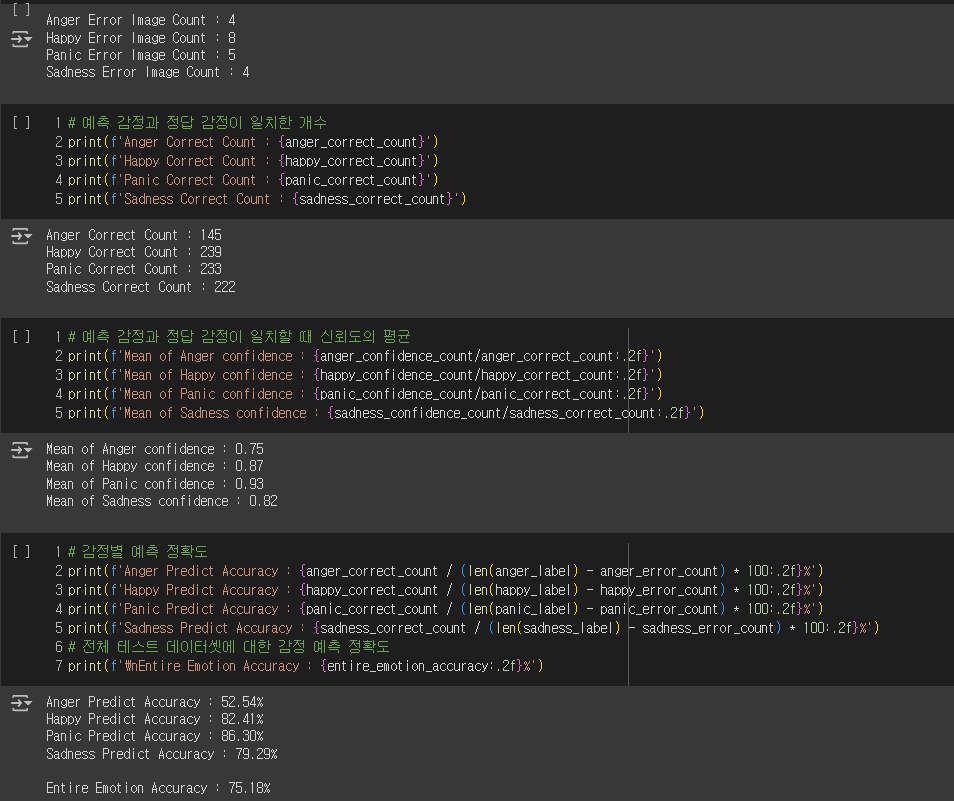

##### 가중치 4적용 결과

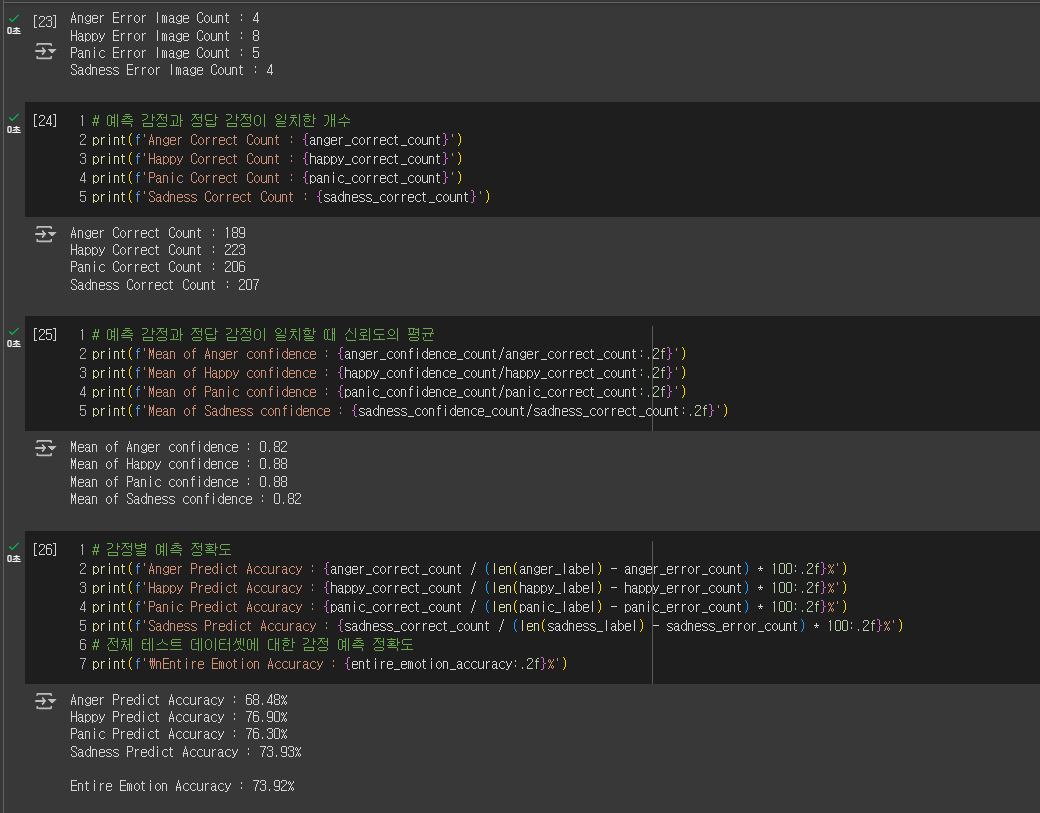

##### 가중치 4.5 적용 결과

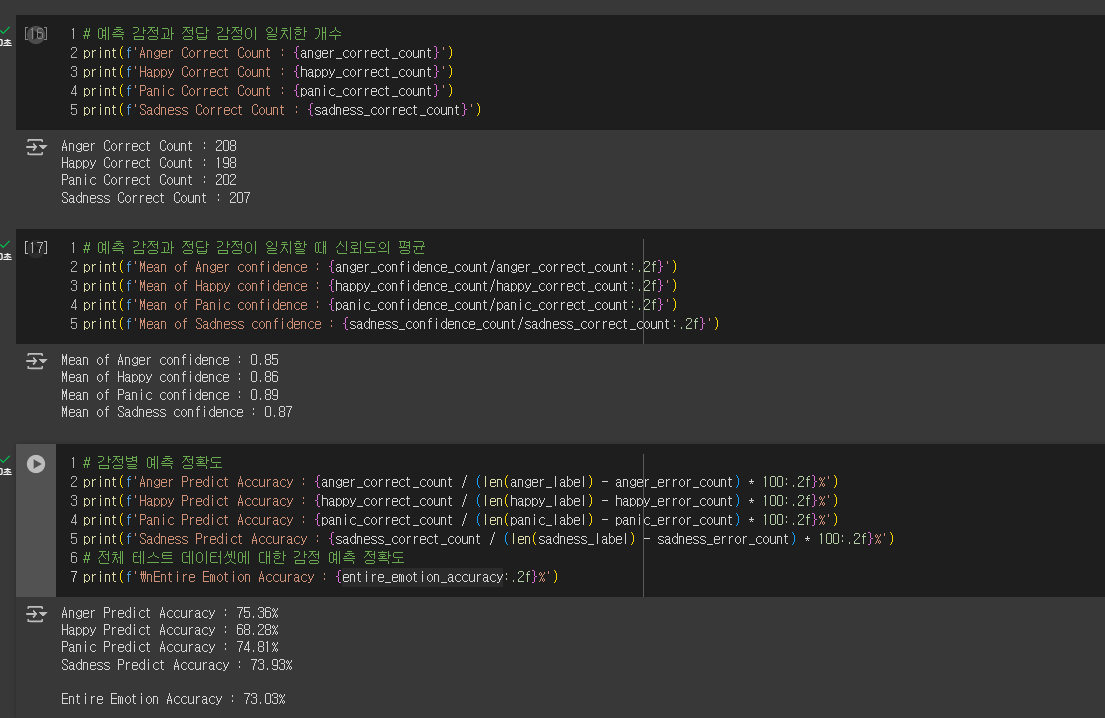

#### 과적합을 방지할 EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience = 10,
    restore_best_weights=True
)

- EarlyStopping의 'patience' 값은 에폭 수의 10%~20%가 적합함.

#### 100 Ephocs model.fit

In [ ]:
num_epochs = 100
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,
    #class_weight=class_weight, # 가중치
    callbacks=[early_stopping] # 과적합 방지 Early Stopping
)

#### 학습 성능 평가

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

136/136 [==============================] - 53s 392ms/step - loss: 0.3497 - accuracy: 0.8770
24/24 [==============================] - 1s 39ms/step - loss: 0.3324 - accuracy: 0.8758<br>
Train Loss: 0.3497, Train Accuracy: 0.8770
Val Loss: 0.3324, Val Accuracy: 0.8758

- Ephoc이 증가할수록 loss가 감소하고 accuracy는 증가했으며 60 Ephocs까지 균일한 성능 향상세를 확인할 수 있었음.
- 이후 loss의 감소 추세와 accuracy의 증가 추세가 매우 더뎠기 때문에 60 Ephocs 지점을 최적화 지점으로 판단.

#### 학습 시각화

![](https://discord.com/channels/1237934105912541256/1237934105912541259/1242623905185923143)
![](https://discord.com/channels/1237934105912541256/1237934105912541259/1242623905185923143)
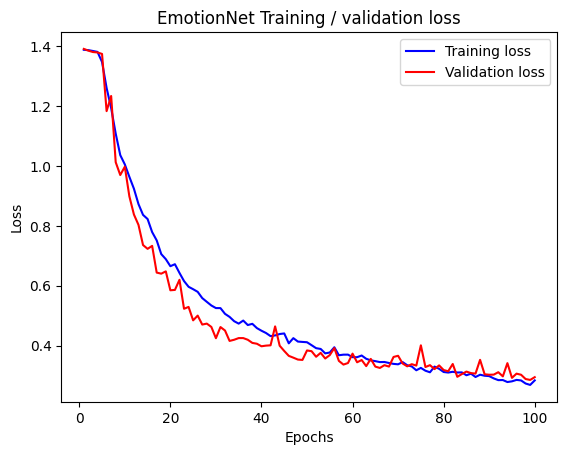


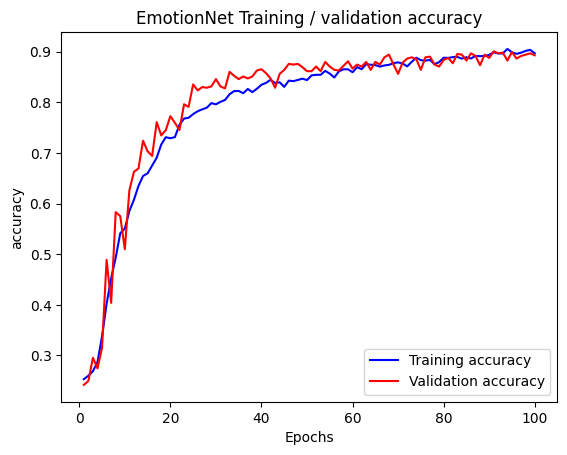

### ViT

#### 라이브러리 Install

In [ ]:
! pip install vit_keras
! pip install tensorflow_addons

In [ ]:
import os
import numpy as np
import tensorflow as tf
from vit_keras import vit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import imgaug.augmenters as iaa
import face_recognition
import imgaug as ia

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#### Path

In [ ]:
train_data_dir = '/content/img_preprocessed/train'
val_data_dir = '/content/img_preprocessed/val'

#### 이미지 크기 및 배치 크기 설정

In [ ]:
image_size = 224
batch_size = 32

#### 데이터 증강 설정

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

#### 데이터 로드

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4324 images belonging to 4 classes.
Found 765 images belonging to 4 classes.


#### ViT_b16 Model Architecture

In [ ]:
base_model = vit.vit_b16(
    image_size=image_size,
    pretrained=True,
    include_top=False,
    pretrained_top=False
)
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Reshape((1, 1, -1))(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # 4개 클래스 anger/happy/sadness/panic
model = Model(inputs=base_model.input, outputs=predictions)

#### 과적합을 방지할 EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience = 7,
    restore_best_weights=True
)

#### Model compile, 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = val_generator,
    callbacks = [early_stopping]
)

Epoch 1/50
136/136 [==============================] - 110s 471ms/step - loss: 0.8386 - accuracy: 0.6924 - val_loss: 0.5218 - val_accuracy: 0.8026
Epoch 2/50
136/136 [==============================] - 61s 445ms/step - loss: 0.4267 - accuracy: 0.8488 - val_loss: 0.3660 - val_accuracy: 0.8876
Epoch 3/50
136/136 [==============================] - 62s 454ms/step - loss: 0.3486 - accuracy: 0.8765 - val_loss: 0.3780 - val_accuracy: 0.8706
Epoch 4/50
136/136 [==============================] - 61s 447ms/step - loss: 0.2837 - accuracy: 0.9003 - val_loss: 0.3051 - val_accuracy: 0.8876
Epoch 5/50
136/136 [==============================] - 61s 445ms/step - loss: 0.2403 - accuracy: 0.9151 - val_loss: 0.2678 - val_accuracy: 0.9085
Epoch 6/50
136/136 [==============================] - 61s 448ms/step - loss: 0.2039 - accuracy: 0.9237 - val_loss: 0.3073 - val_accuracy: 0.9046
Epoch 7/50
136/136 [==============================] - 61s 446ms/step - loss: 0.1987 - accuracy: 0.9274 - val_loss: 0.4162 - val_a

#### 학습 성능 평가

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

24/24 [==============================] - 3s 113ms/step - loss: 0.2678 - accuracy: 0.9085


#### Loss, Accuracy 시각화

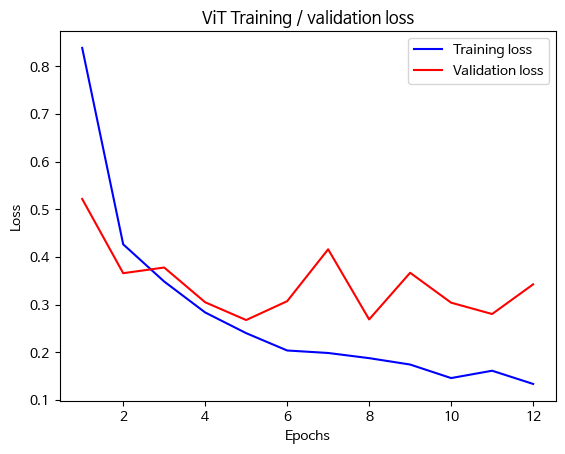

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('ViT Training / validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

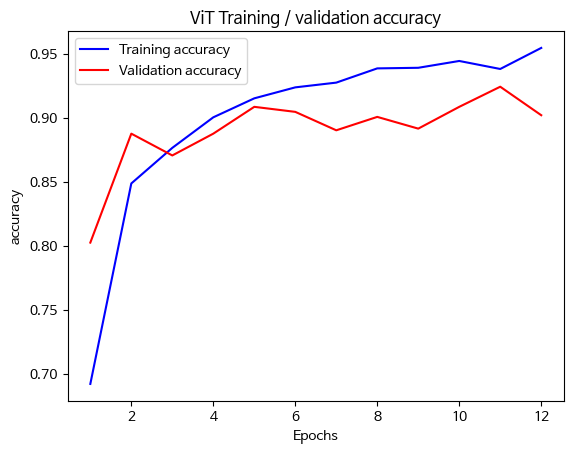

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('ViT Training / validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### 성능 Report


In [ ]:
import zipfile
import os

def unzip_file(zip_file_path, extract_dir):
    # 압축 파일 열기
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # 압축 해제
        zip_ref.extractall(extract_dir)

# 압축 파일 경로와 추출할 디렉토리 경로 지정
zip_file_path = '/content/drive/MyDrive/Project/Data/Test_data/img_p/test_img_p.zip'
extract_dir = '/content/test_img_p'

# 압축 파일 풀기
unzip_file(zip_file_path, extract_dir)

In [ ]:
test_data_dir = '/content/test_img_p'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  test_data_dir,
  target_size=(image_size, image_size),
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=False
)

Found 966 images belonging to 4 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(val_generator)

24/24 [==============================] - 3s 117ms/step - loss: 0.2678 - accuracy: 0.9085


#### 성능 Report

- 전처리 후 Export 해둔 TestDataset을 활용했기 떄문에 실제 성능과 차이가 있음

In [ ]:
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

print(classification_report(test_true_labels, test_predictions, target_names=list(train_generator.class_indices.keys())))

31/31 [==============================] - 6s 111ms/step
              precision    recall  f1-score   support

       anger       0.70      0.62      0.66       126
       happy       0.94      0.94      0.94       290
       panic       0.89      0.83      0.86       270
     sadness       0.81      0.90      0.85       280

    accuracy                           0.86       966
   macro avg       0.83      0.82      0.83       966
weighted avg       0.86      0.86      0.85       966



## EfficientNet B0

### 라이브러리 호출

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

### 경로 정의 (로컬)

In [ ]:
base_dir = 'img_preprocessed/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

### 데이터증강 및 데이터 로드

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

#데이터 로드
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

### 모델 정의

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(4, activation='softmax', kernel_regularizer=l2(0.01))  # L2 정규화 추가
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 콜백 정의 (얼리 스탑, 학습률 감소)

In [ ]:
# 학습률 감소 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)


#조기 중지
early_stop = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    verbose=1            
)

### 모델 학습

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[reduce_lr, early_stop] 
)

### 결과 리포트

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

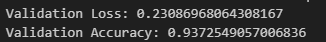

## EfficientNet B7

### 구조는 B0와 완전히 같음

In [ ]:
from tensorflow.keras.applications import EfficientNetB7

base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### 결과 리포트

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

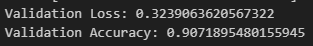

## DeiT

### 라이브러리 호출

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import DeiTForImageClassification, DeiTFeatureExtractor
import numpy as np
import os

### 경로 정의 (로컬)

In [ ]:
base_dir = 'img_preprocessed/'  
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

### feature_extractor 설정

In [ ]:
feature_extractor = DeiTFeatureExtractor.from_pretrained('facebook/deit-base-distilled-patch16-224')

### 데이터변환 정의

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

### 데이터 로드 및 데이터 로더 설정

In [ ]:
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### 모델 설정

In [ ]:
# 모델 설정
model = DeiTForImageClassification.from_pretrained('facebook/deit-base-distilled-patch16-224', num_labels=4)

# Optimizer 설정
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# 학습 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

### 학습함수 정의

In [ ]:
def train_epoch(model, data_loader, optimizer, device):
    model.train() # 모델을 학습 모드로 설정
    total_loss = 0
    correct = 0
    total = 0
    for batch in data_loader:
        inputs, labels = batch
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs).logits # 모델을 사용하여 예측값 계산
        loss = torch.nn.CrossEntropyLoss()(outputs, labels) # 손실 함수 계산
        loss.backward() # 역전파를 통해 기울기 계산
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1) # 가장 높은 값의 예측 라벨 선택
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
    accuracy = correct / total
    average_loss = total_loss / len(data_loader)
    return average_loss, accuracy

### 평가함수 정의

In [ ]:
def evaluate(model, data_loader, device):
    model.eval() # 모델을 평가 모드로 설정
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad(): # 평가 시에는 기울기를 계산하지 않음
        for batch in data_loader:
            inputs, labels = batch
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs).logits # 모델을 사용하여 예측값 계산
            loss = torch.nn.CrossEntropyLoss()(outputs, labels)
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    accuracy = correct / total
    average_loss = total_loss / len(data_loader)
    return average_loss, accuracy

### 학습 루프 정의

In [ ]:
# 학습 루프
num_epochs = 50
best_val_loss = np.inf
patience = 5
early_stopping_counter = 0

### 학습 시작

In [ ]:
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_loader, optimizer, device)
    val_loss, val_accuracy = evaluate(model, val_loader, device)
    
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
    
    # 조기 종료 체크
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        # 모델 저장
        model.save_pretrained('model/')
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter >= patience:
        break

## TEST DATA 실제 Emotion Classification

### 반복문을 통해 TEST DATA의 실제 분류 성공 Counts 수를 구하는 함수

- Test Dataset이 약 1100개였기 때문에 반복문을 통해 실제 누적 Count 수를 구할 수 있었음.
- 추후 대규모 데이터셋에는 굉장히 비효율적인 성능 평가 방법이 될 것으로 추측

In [ ]:
# 이미지 전처리
def preprocess_image(label, path):
  img = get_image(label['filename'], path) # 이미지 불러오기
  img = crop_face(label, img) # 이미지 크롭
  img_info = extract_face_info_mtcnn(img) # 이미지에서 얼굴 정보 추출
  img = rotate_image(img, img_info) # 눈 수평 회전
  img = normalize_face(img, img_info) # 코 기준 이미지 센터로 이동
  img_array = np.expand_dims(img, axis=0)  # 마지막 차원에 채널 추가
  img_array = img_array.astype('float32') / 255.0  # 0~1 사이 값으로 정규화

  return img_array

# 감정 분류 함수
def predict_emotion(img_array):
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions)
  predicted_emotion = emotion_labels[predicted_class]
  confidence = predictions[0][predicted_class]

  return predicted_emotion, confidence

# 이미지 전처리 및 감정 예측
def get_predict_accuracy(label, path, true_emotion):
  correct_count = 0
  error_count = 0
  confidence_count = 0

  for i in range(5):
    try:
      img_array = preprocess_image(label[i], path)
      predicted_emotion, confidence = predict_emotion(img_array)
    except Exception as e:
      error_count += 1
      continue

    if predicted_emotion == true_emotion:
      correct_count += 1
      confidence_count += confidence

    filename = label[i]['filename']
    print(f'{i+1}, filename : {filename}')
    print(f'예측 : {predicted_emotion}\n실제 : {true_emotion}\n신뢰도 : {confidence:.2f}')

  return correct_count, error_count, confidence_count

In [ ]:
anger_correct_count, anger_error_count, anger_confidence_count = get_predict_accuracy(test_anger_label, '/content/test/anger/', 'anger')
happy_correct_count, happy_error_count, happy_confidence_count = get_predict_accuracy(test_happy_label, '/content/test/happy/', 'happy')
panic_correct_count, panic_error_count, panic_confidence_count = get_predict_accuracy(test_panic_label, '/content/test/panic/', 'panic')
sadness_correct_count, sadness_error_count, sadness_confidence_count = get_predict_accuracy(test_sadness_label, '/content/test/sadness/', 'sadness')

In [ ]:
entire_correct_count = anger_correct_count + happy_correct_count + panic_correct_count + sadness_correct_count
entire_error_count = anger_error_count + happy_error_count + panic_error_count + sadness_error_count
entire_lable_length = len(test_anger_label) + len(test_happy_label) + len(test_panic_label) + len(test_sadness_label)
entire_emotion_accuracy = entire_correct_count / (entire_lable_length - entire_error_count) * 100

### 분류 결과 출력

#### 예측을 위해 테스트 데이터 전처리를 시도했지만 전처리에 실패한 개수

In [ ]:
print(f'Anger Error Image Count : {anger_error_count}')
print(f'Happy Error Image Count : {happy_error_count}')
print(f'Panic Error Image Count : {panic_error_count}')
print(f'Sadness Error Image Count : {sadness_error_count}')

#### 예측 감정과 정답 감정이 일치한 개수

In [ ]:
print(f'Anger Correct Count : {anger_correct_count}')
print(f'Happy Correct Count : {happy_correct_count}')
print(f'Panic Correct Count : {panic_correct_count}')
print(f'Sadness Correct Count : {sadness_correct_count}')

#### 예측 감정과 정답 감정이 일치할 때 신뢰도의 평균

In [ ]:
print(f'Mean of Anger confidence : {anger_confidence_count/anger_correct_count:.2f}')
print(f'Mean of Happy confidence : {happy_confidence_count/happy_correct_count:.2f}')
print(f'Mean of Panic confidence : {panic_confidence_count/panic_correct_count:.2f}')
print(f'Mean of Sadness confidence : {sadness_confidence_count/sadness_correct_count:.2f}')

#### 감정별 예측 정확도, 전체 테스트 데이터셋에 대한 감정 예측 정확도

In [ ]:
# 감정별 예측 정확도
print(f'Anger Predict Accuracy : {anger_correct_count / (len(test_anger_label) - anger_error_count) * 100:.2f}%')
print(f'Happy Predict Accuracy : {happy_correct_count / (len(test_happy_label) - happy_error_count) * 100:.2f}%')
print(f'Panic Predict Accuracy : {panic_correct_count / (len(test_panic_label) - panic_error_count) * 100:.2f}%')
print(f'Sadness Predict Accuracy : {sadness_correct_count / (len(test_sadness_label) - sadness_error_count) * 100:.2f}%')

# 전체 테스트 데이터셋에 대한 감정 예측 정확도
print(f'\nEntire Emotion Accuracy : {entire_emotion_accuracy:.2f}%')

### MODEL별 결과 비교

#### EmotionNet

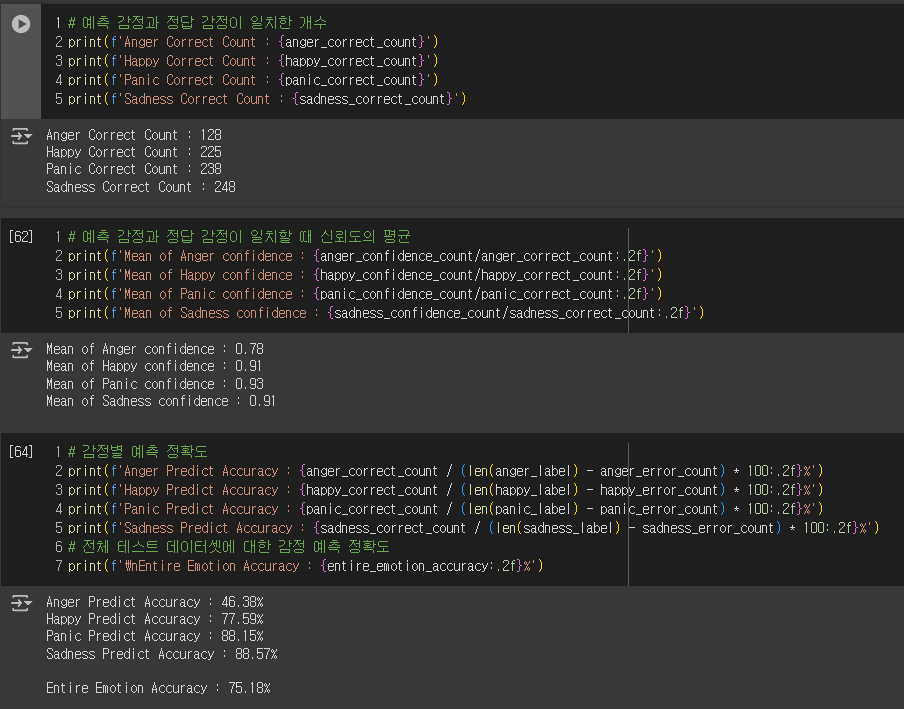

#### ViT

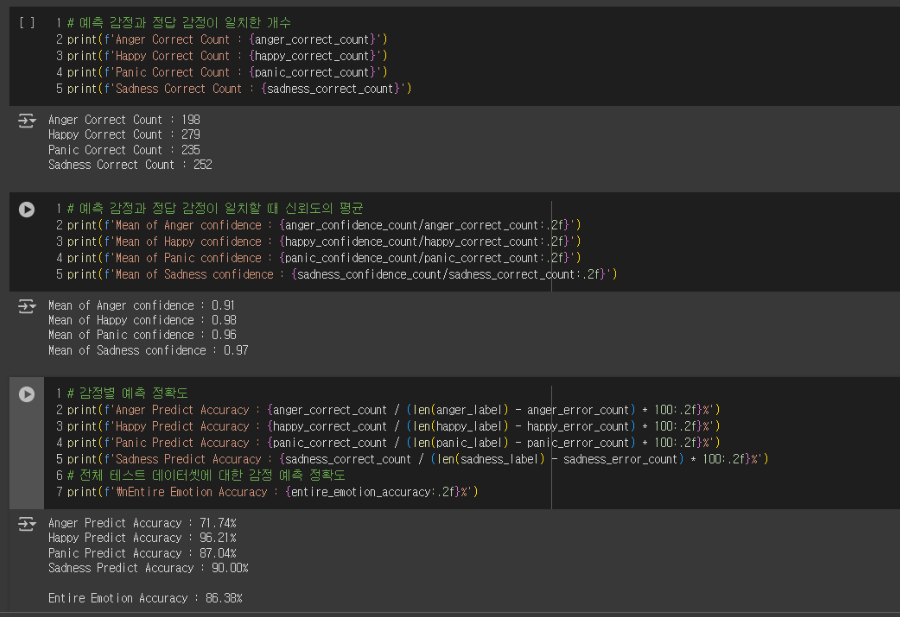

#### EfficientNet B0

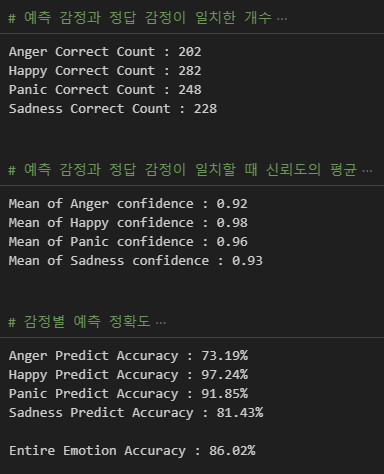

#### EfficientNet B7

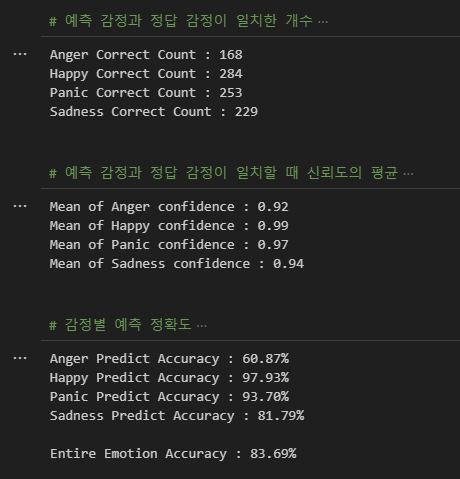

#### DeiT

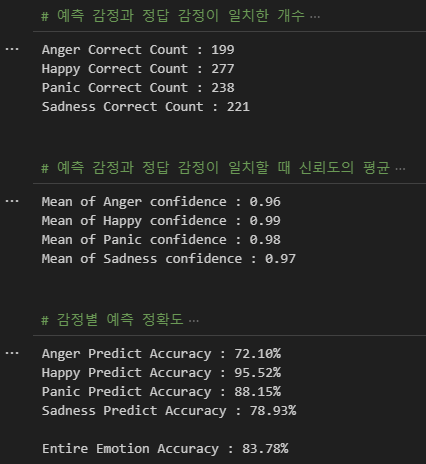

## 모델 앙상블

### 라이브러리 호출

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import torch
from transformers import DeiTForImageClassification
from scipy.special import softmax
from sklearn.metrics import accuracy_score
from transformers import DeiTForImageClassification, DeiTFeatureExtractor
import torchvision.transforms as transforms
import safetensors.torch
import os
import cv2
import dlib
import torch
from PIL import Image
from mtcnn import MTCNN

### 모델 호출

In [ ]:
eff0 = load_model("model/efficientnet_face_emotion_new_colab.h5") #efficientnet b0, tensorflow 2.15.0 ver
eff7 = load_model("model/efficientnet_face_emotion_b7_new.h5") #efficientnet b7
vit_model = tf.saved_model.load("model/ViT_b16") #ViT 모델

feature_extractor = DeiTFeatureExtractor.from_pretrained('facebook/deit-base-distilled-patch16-224') #사전학습 불러오기 
# 데이터 변환 설정
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

model = DeiTForImageClassification.from_pretrained('facebook/deit-base-distilled-patch16-224', num_labels=4)
state_dict = safetensors.torch.load_file('model/model.safetensors') #DeiT 모델 불러오기
model.load_state_dict(state_dict)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

### 라벨 및 모델 분류

In [ ]:
models_tf = [eff0, eff7, vit_model] #텐서플로우
models_pt = [model] #파이토치

labels = ['Anger', 'Happy', 'Panic', 'Sadness']
label_to_index = {label: i for i, label in enumerate(labels)}

#### 전처리 함수는 상술 하였기에, 생략하였음

### 예측함수 정의 (모델 그룹간의 구조의 차이로 인해 코드 차이가 발생)

In [ ]:
def predict_ensemble_tf(models, input):
    votes = []
    confidences = []

    for model in models:
        output = model(input, training=False)
        probabilities = tf.nn.softmax(output, axis=1)
        confidence = tf.reduce_max(probabilities, axis=1)
        predicted = tf.argmax(probabilities, axis=1)
        votes.append(predicted.numpy()[0])
        confidences.append(confidence.numpy()[0])
    
    return votes, confidences

def predict_ensemble_pt(models, input):
    votes = []
    confidences = []

    for model in models:
        model.eval()
        with torch.no_grad():
            output = model(input.to(device)).logits
            probabilities = softmax(output.cpu().numpy(), axis=1)
            confidence = np.max(probabilities, axis=1)
            predicted = np.argmax(probabilities, axis=1)
            votes.append(predicted[0])
            confidences.append(confidence[0])
    
    return votes, confidences


### 보팅 앙상블 코드

In [ ]:
def vote_and_classify(votes, confidences):
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote] += 1
        else:
            vote_count[vote] = 1
    
    max_vote = max(vote_count, key=vote_count.get)
    max_count = vote_count[max_vote]
    
    if max_count >= 3:  # 모델 4개 중 3개가 같다고 판단
        vote_prob = max_count / len(votes)
        return max_vote, vote_prob
    else:
        # Confidence가 가장 높은 예측을 반환
        max_confidence_index = confidences.index(max(confidences))
        return votes[max_confidence_index], max(confidences)

### 경로 정의 (로컬)

In [ ]:
data_dir = 'img/test'
test_images = []
predictions = []
true_labels = []
confidences = []

In [ ]:
for label in labels:
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            if not os.path.isfile(image_path):
                print(f"Error: File '{image_path}' does not exist.")
                continue
            test_images.append((image_path, label_to_index[label]))

### 예측 실행 

In [ ]:
error_count = 0

for image_path, true_label in test_images:
    image = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_COLOR) #파일 경로에 한글이 있어서 변환
    if image is None:
        print(f"Error: Could not read image from '{image_path}'")
        continue
    
    # 얼굴 전처리
    try:
        image = cropface_dlib(image)
    except Exception as e:
        error_count += 1  # 에러 발생 시 카운터 증가
        print(f"Error: {str(e)} for image '{image_path}'")
        continue
    
    try:
        face_info = extract_faceinfo_mtcnn(image)
    except Exception as e:
        error_count += 1  # 에러 발생 시 카운터 증가
        print(f"Error: {str(e)} for image '{image_path}'")
        continue

    if face_info is None:  # face_info가 None인 경우 건너뜀
        print(f"Error: No face detected in image '{image_path}'")
        error_count += 1
        continue
    
    image = rotate_image(image, face_info)
    image = normalize_face(image, face_info)
    image = cv2.resize(image, (224, 224))

    # TensorFlow 모델 예측
    image_tf = image.astype('float32') / 255.0
    image_tf = np.expand_dims(image_tf, axis=0)
    votes_tf, confidences_tf = predict_ensemble_tf(models_tf, image_tf)

    # PyTorch 모델 예측
    img_array = image.astype('float32') / 255.0
    img_array = np.transpose(img_array, (2, 0, 1))  # 채널 순서 변경 (HWC -> CHW)
    img_tensor = torch.tensor(img_array).unsqueeze(0).to(device)
    votes_pt, confidences_pt = predict_ensemble_pt(models_pt, img_tensor)
    
    votes = votes_tf + votes_pt
    confidences_all = confidences_tf + confidences_pt

    predicted, vote_prob = vote_and_classify(votes, confidences_all)
    
    predictions.append(predicted)
    true_labels.append(true_label)
    confidences.append(vote_prob)

## 앙상블 모델 성능

### 전체 정확도

In [ ]:
accuracy = accuracy_score(true_labels, predictions)
print(f'Voting Ensemble Accuracy: {accuracy * 100:.2f}%')
print(f"Total errors: {error_count}")

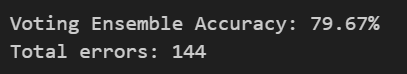

### 감정별 신뢰도, 정확도

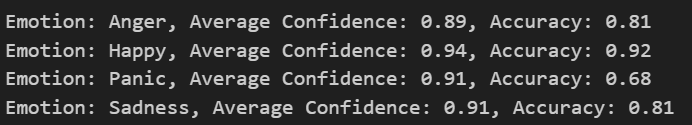